# **# Library Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# **# Dataset Overview**

In [4]:
dtfile = pd.read_csv("/content/CABr Survey Dataset.csv")
dataset = dtfile.copy()

In [5]:
print("Dataset Dimensions:\n")
print("(rows, cols)")
dataset.shape

Dataset Dimensions:

(rows, cols)


(569, 35)

In [6]:
print("Dataset Sample\n")
dataset.head()

Dataset Sample



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,fluidity_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,fluidity_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.576188,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.757156,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.099140,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.764986,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.074963,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.783418,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.438925,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.950662,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.536263,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.953121,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print("Dataset Metrics\n")
dataset.info()

Dataset Metrics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   fluidity_mean            432 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           556 non-null    float64
 10  concave points_mean      556 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_s

In [8]:
print("Null Counts\n")
dataset.isnull().sum()

Null Counts



,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
fluidity_mean,137
smoothness_mean,0
compactness_mean,0
concavity_mean,13


In [9]:
print("Characteristics\n")
dataset.describe()

Characteristics



,id,radius_mean,texture_mean,perimeter_mean,area_mean,fluidity_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,fluidity_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,432.000000,569.000000,569.000000,556.000000,556.000000,...,569.000000,569.000000,569.000000,284.000000,569.000000,569.000000,556.000000,556.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.390405,0.096360,0.104341,0.090876,0.050063,...,25.677223,107.261213,880.583128,0.738631,0.132369,0.254265,0.278553,0.117286,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.219999,0.014064,0.052813,0.079468,0.038517,...,6.146258,33.602542,569.356993,0.151468,0.022832,0.157336,0.206803,0.064087,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.002947,0.052630,0.019380,0.000692,0.001852,...,12.020000,50.410000,185.200000,0.501393,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.210226,0.086370,0.064920,0.030880,0.020895,...,21.080000,84.110000,515.300000,0.605276,0.116600,0.147200,0.121800,0.065713,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.395755,0.095870,0.092630,0.064905,0.034840,...,25.410000,97.660000,686.500000,0.737846,0.131300,0.211900,0.231400,0.101700,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.581326,0.105300,0.130400,0.132325,0.074842,...,29.720000,125.400000,1084.000000,0.866136,0.146000,0.339100,0.386200,0.163150,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.748761,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.999158,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **# Dataset PreProcessing**

In [10]:
print("Initial Dimensions:\n")
print("(rows, cols)")
dataset.shape

Initial Dimensions:

(rows, cols)


(569, 35)

In [11]:
dropCols = []
for col in dataset.columns:
    if dataset[col].isnull().sum() > 100:
        dropCols.append(col)

print("Droppable Columns:\n", dropCols)
dataset = dataset.drop(dropCols, axis=1)

Droppable Columns:
 ['fluidity_mean', 'fluidity_se', 'fluidity_worst']


In [12]:
print("After Columns Dropped:\n")
print("(rows, cols)")
dataset.shape

After Columns Dropped:

(rows, cols)


(569, 32)

In [13]:
print("Null Counts\n")
dataset.isnull().sum()

Null Counts



,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,13
concave points_mean,13


In [14]:
dropRows = []
for row in dataset.index:
    if dataset.iloc[row].isnull().sum() > 5:
        dropRows.append(row)

print("Droppable Rows:\n", dropRows)
dataset = dataset.drop(dropRows, axis=0)

Droppable Rows:
 [140, 175, 314, 473, 550, 561]


In [15]:
print("After Rows Dropped:\n")
print("(rows, cols)")
dataset.shape

After Rows Dropped:

(rows, cols)


(563, 32)

In [16]:
print("Null Counts\n")
dataset.isnull().sum()

Null Counts



,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,7
concave points_mean,7


In [17]:
imputeCols = []
for col in dataset.columns:
    if dataset[col].isnull().sum() > 0:
        imputeCols.append(col)

print("Imputable Columns:\n", imputeCols)
imputeMean = SimpleImputer(missing_values=np.NaN, strategy='mean')

imputeMean.fit(dataset[imputeCols])
dataset.loc[:, imputeCols] = imputeMean.transform(dataset[imputeCols])

Imputable Columns:
 ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']


In [18]:
print("After Imputation:\n")
print("(rows, cols)")
dataset.shape

After Imputation:

(rows, cols)


(563, 32)

In [19]:
print("Null Counts\n")
dataset.isnull().sum()

Null Counts



,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [20]:
dataset["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [21]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1,'B': 0})
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
dataset['diagnosis'].value_counts()

,count
diagnosis,
0,351
1,212


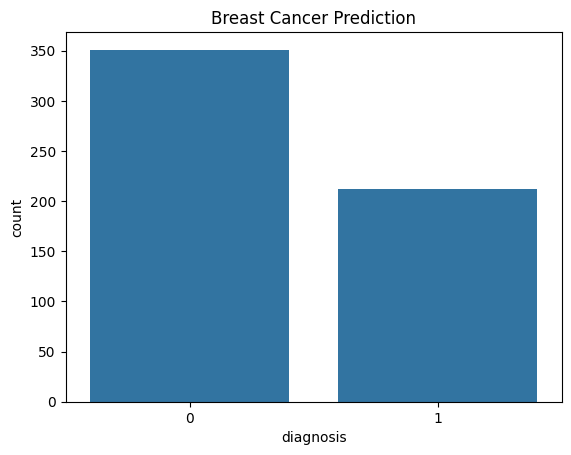

In [23]:
sbn.countplot(x='diagnosis', data=dataset)
plt.title('Breast Cancer Prediction')
plt.show()

In [24]:
dropFeatures = ["id"]
print("Droppable Features:\n", dropFeatures)
dataset = dataset.drop(dropFeatures, axis=1)

Droppable Features:
 ['id']


In [25]:
print("After Features Dropped:\n")
print("(rows, cols)")
dataset.shape

After Features Dropped:

(rows, cols)


(563, 31)

In [26]:
print("Null Counts\n")
dataset.isnull().sum()

Null Counts



,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [27]:
dataset.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.728567,0.425818,0.741244,0.707066,0.356128,0.593201,0.688500,0.770758,0.331127,...,0.775302,0.464294,0.781796,0.732069,0.417957,0.587534,0.651218,0.793311,0.415201,0.320667
radius_mean,0.728567,1.000000,0.330263,0.997831,0.987452,0.167329,0.500111,0.656204,0.803912,0.148161,...,0.969122,0.298108,0.964665,0.940847,0.112251,0.405622,0.499674,0.720800,0.161342,0.000955
texture_mean,0.425818,0.330263,1.000000,0.336714,0.327821,-0.011047,0.248240,0.319346,0.312497,0.087708,...,0.360569,0.910540,0.366737,0.351223,0.092756,0.289980,0.321072,0.323650,0.120549,0.131084
perimeter_mean,0.741244,0.997831,0.336714,1.000000,0.986607,0.204157,0.551426,0.696265,0.832910,0.183734,...,0.969047,0.304698,0.969963,0.941324,0.143213,0.448308,0.537394,0.748665,0.186551,0.045096
area_mean,0.707066,0.987452,0.327821,0.986607,1.000000,0.173727,0.493222,0.671090,0.810767,0.151135,...,0.962462,0.289394,0.958825,0.958859,0.116869,0.383456,0.492093,0.707190,0.140674,-0.001766
smoothness_mean,0.356128,0.167329,-0.011047,0.204157,0.173727,1.000000,0.658220,0.512559,0.544517,0.554458,...,0.210013,0.045991,0.235705,0.203565,0.803187,0.469599,0.422409,0.492279,0.388535,0.495503
compactness_mean,0.593201,0.500111,0.248240,0.551426,0.493222,0.658220,1.000000,0.874112,0.820604,0.605999,...,0.529649,0.254658,0.585059,0.504724,0.560865,0.863818,0.805305,0.806399,0.508764,0.686272
concavity_mean,0.688500,0.656204,0.319346,0.696265,0.671090,0.512559,0.874112,1.000000,0.918966,0.507727,...,0.670689,0.307777,0.712519,0.663435,0.436170,0.741563,0.880421,0.859103,0.404514,0.512092
concave points_mean,0.770758,0.803912,0.312497,0.832910,0.810767,0.544517,0.820604,0.918966,1.000000,0.469993,...,0.815021,0.301670,0.840848,0.799655,0.439036,0.650787,0.742496,0.908038,0.369898,0.363050
symmetry_mean,0.331127,0.148161,0.087708,0.183734,0.151135,0.554458,0.605999,0.507727,0.469993,1.000000,...,0.186175,0.105563,0.219865,0.176997,0.422111,0.475281,0.440821,0.442660,0.696696,0.435646


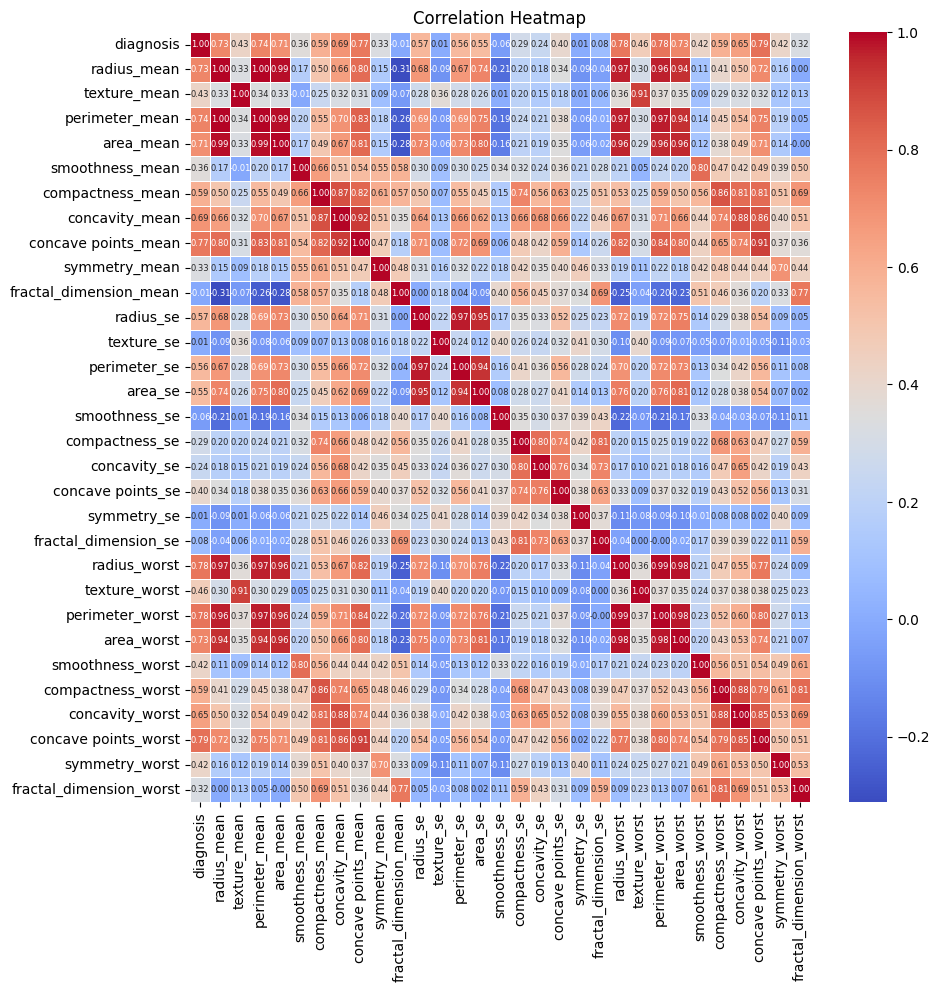

In [28]:
corrMatrix = dataset.corr()
plt.figure(figsize = (10, 10))
sbn.heatmap(corrMatrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

In [29]:
dropFeatures = ["perimeter_mean", "area_mean", "perimeter_worst", "area_worst", "compactness_mean", "concavity_mean", "compactness_worst", "concavity_worst"]
print("Droppable Features:\n", dropFeatures)
dataset = dataset.drop(dropFeatures, axis=1)

Droppable Features:
 ['perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst', 'compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst']


In [30]:
print("After Features Dropped:\n")
print("(rows, cols)")
dataset.shape

After Features Dropped:

(rows, cols)


(563, 23)

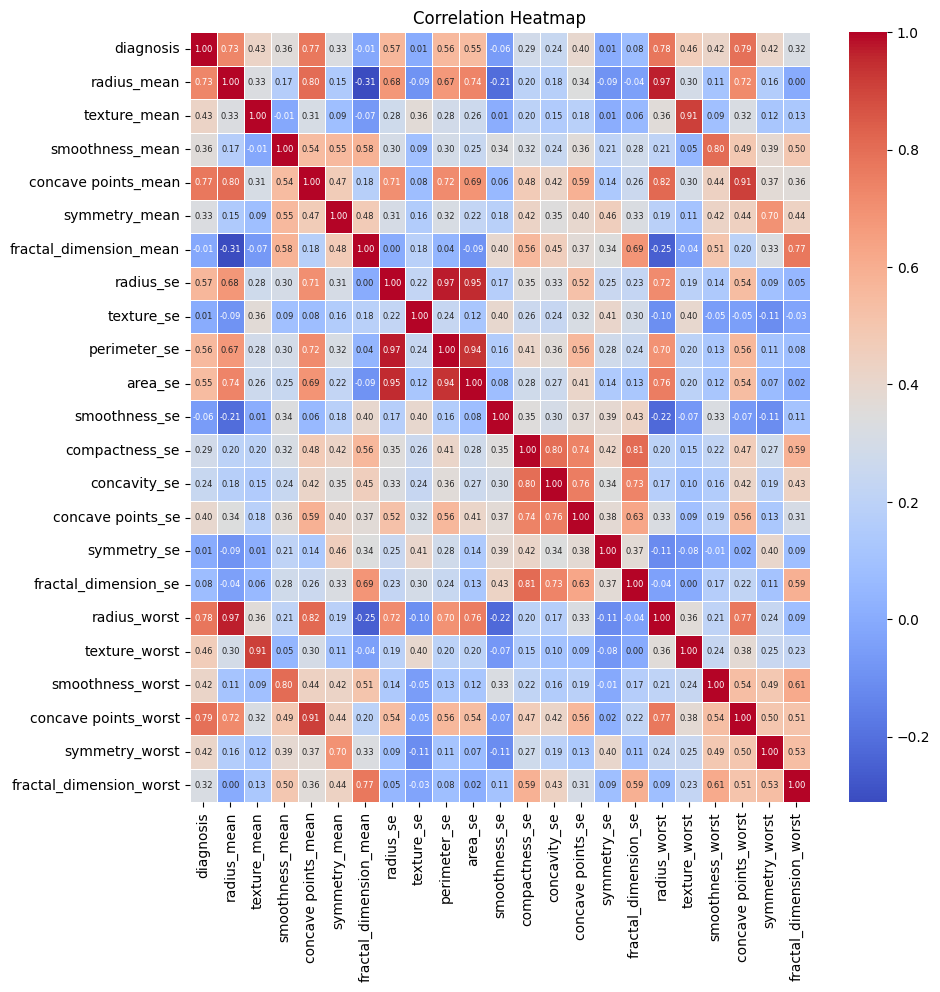

In [31]:
corrMatrix = dataset.corr()
plt.figure(figsize = (10, 10))
sbn.heatmap(corrMatrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

In [32]:
print("PreProcessed Dataset Dimensions:\n")
print("(rows, cols)")
dataset.shape

PreProcessed Dataset Dimensions:

(rows, cols)


(563, 23)

In [33]:
print("Null Counts\n")
dataset.isnull().sum()

Null Counts



,0
diagnosis,0
radius_mean,0
texture_mean,0
smoothness_mean,0
concave points_mean,0
symmetry_mean,0
fractal_dimension_mean,0
radius_se,0
texture_se,0
perimeter_se,0


In [34]:
dataset['diagnosis'].value_counts()

,count
diagnosis,
0,351
1,212


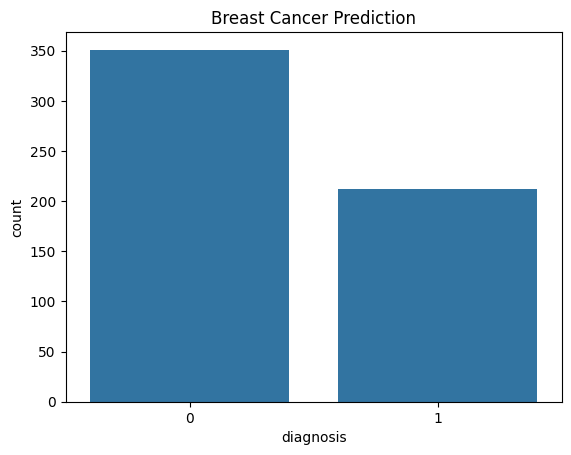

In [35]:
sbn.countplot(x='diagnosis', data=dataset)
plt.title('Breast Cancer Prediction')
plt.show()

# **# Feature Scaling & Dataset Splitting**

In [36]:
Y = dataset['diagnosis']
X = dataset.drop('diagnosis', axis = 1)

trX, tsX, trY, tsY = train_test_split(X, Y, test_size=0.3, random_state = 42)
randos = RandomOverSampler(random_state=42)
trX_smp, trY_smp = randos.fit_resample(trX, trY)

scale = StandardScaler()
trX_std = scale.fit_transform(trX_smp)
tsX_std = scale.transform(tsX)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# **# Model 1: Logistic Regression**

In [37]:
model = LogisticRegression(random_state = 42)
model.fit(trX_std, trY_smp)

predLR = model.predict(tsX_std)
accuLR = accuracy_score(tsY, predLR)
reportLR = classification_report(tsY, predLR)

print(f'Accuracy: {accuLR:.4f}')
print('\nClassification Report:\n', reportLR)

Accuracy: 0.9704

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       103
           1       0.94      0.98      0.96        66

    accuracy                           0.97       169
   macro avg       0.97      0.97      0.97       169
weighted avg       0.97      0.97      0.97       169



# **# Model 2: Naïve Bayes**

In [38]:
model = GaussianNB()
model.fit(trX_std, trY_smp)

predNB = model.predict(tsX_std)
accuNB = accuracy_score(tsY, predNB)
reportNB = classification_report(tsY, predNB)

print(f'Accuracy: {accuNB:.4f}')
print('\nClassification Report:\n', reportNB)

Accuracy: 0.9467

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       103
           1       0.95      0.91      0.93        66

    accuracy                           0.95       169
   macro avg       0.95      0.94      0.94       169
weighted avg       0.95      0.95      0.95       169



# **# Model 3: K-Nearest Neighbors**

In [39]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(trX_std, trY_smp)

predKNN = model.predict(tsX_std)
accuKNN = accuracy_score(tsY, predKNN)
reportKNN = classification_report(tsY, predKNN)

print(f'Accuracy: {accuKNN:.4f}')
print('\nClassification Report:\n', reportKNN)

Accuracy: 0.9645

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       103
           1       0.94      0.97      0.96        66

    accuracy                           0.96       169
   macro avg       0.96      0.97      0.96       169
weighted avg       0.96      0.96      0.96       169



# **# Model Selection & Comparison Analysis**

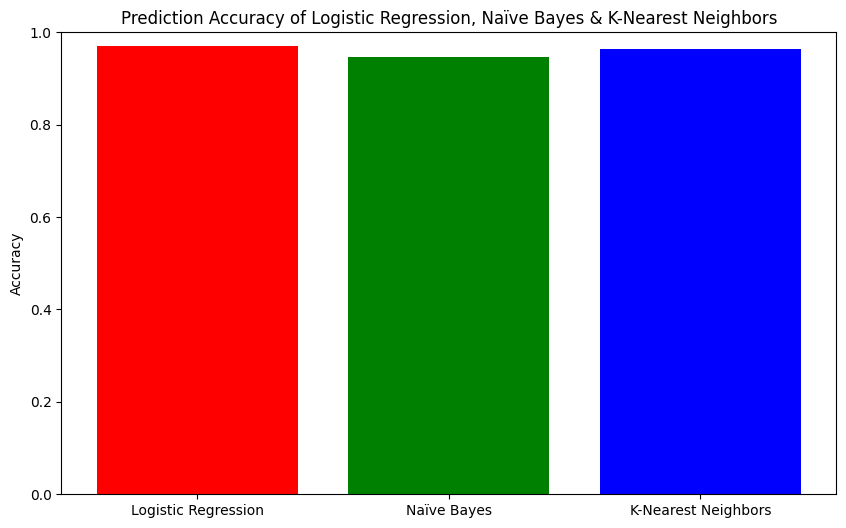

In [40]:
models = ["Logistic Regression", "Naïve Bayes", "K-Nearest Neighbors"]
accus = [accuLR, accuNB, accuKNN]

plt.figure(figsize=(10, 6))
plt.bar(models, accus, color = ["red", "green", "blue"])

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Prediction Accuracy of Logistic Regression, Naïve Bayes & K-Nearest Neighbors")
plt.show()

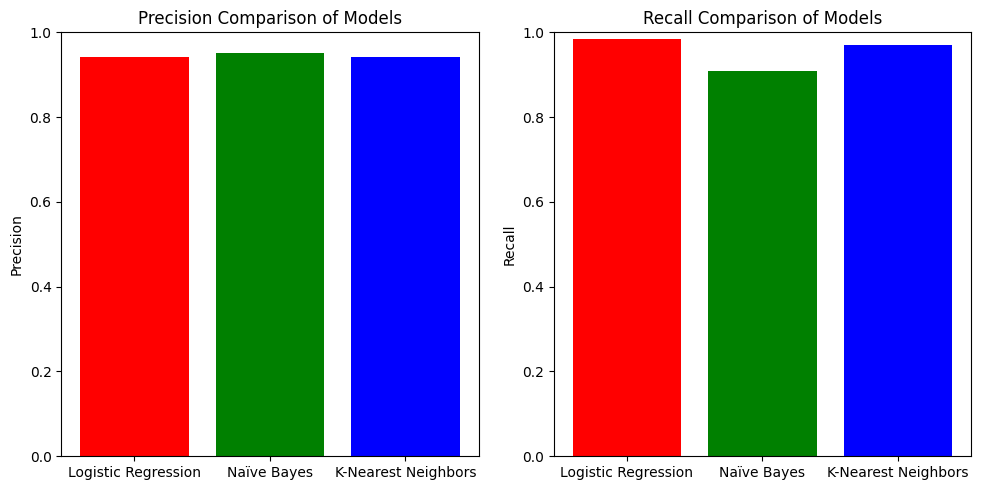

In [41]:
precLR = precision_score(tsY, predLR)
recLR = recall_score(tsY, predLR)

precNB = precision_score(tsY, predNB)
recNB = recall_score(tsY, predNB)

precKNN = precision_score(tsY, predKNN)
recKNN = recall_score(tsY, predKNN)

scoresPrec = [precLR, precNB, precKNN]
scoresRec = [recLR, recNB, recKNN]
models = ["Logistic Regression", "Naïve Bayes", "K-Nearest Neighbors"]
fig, (axiss1, axiss2) = plt.subplots(1, 2, figsize=(10, 5))

axiss1.bar(models, scoresPrec, color=["red", "green", "blue"])
axiss1.set_ylim(0, 1)
axiss1.set_ylabel("Precision")
axiss1.set_title("Precision Comparison of Models")

axiss2.bar(models, scoresRec, color=["red", "green", "blue"])
axiss2.set_ylim(0, 1)
axiss2.set_ylabel("Recall")
axiss2.set_title("Recall Comparison of Models")

plt.tight_layout()
plt.show()

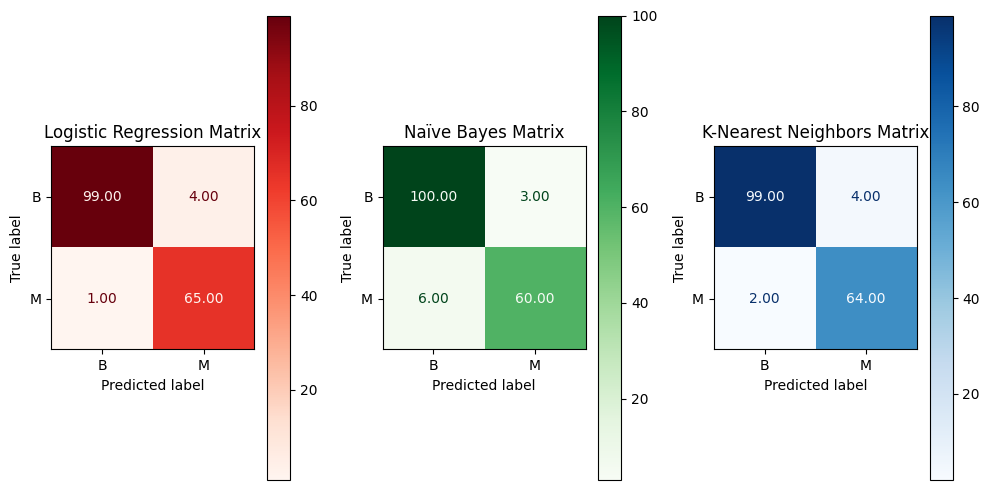

In [42]:
cmatLR = confusion_matrix(tsY, predLR)
cmatNB = confusion_matrix(tsY, predNB)
cmatKNN = confusion_matrix(tsY, predKNN)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

showLR = ConfusionMatrixDisplay(cmatLR, display_labels=['B', 'M'])
showLR.plot(ax=axs[0], cmap=plt.cm.Reds, values_format='.2f')
axs[0].set_title('Logistic Regression Matrix')

showNB = ConfusionMatrixDisplay(cmatNB, display_labels=['B', 'M'])
showNB.plot(ax=axs[1], cmap=plt.cm.Greens, values_format='.2f')
axs[1].set_title('Naïve Bayes Matrix')

showKNN = ConfusionMatrixDisplay(cmatKNN, display_labels=['B', 'M'])
showKNN.plot(ax=axs[2], cmap=plt.cm.Blues, values_format='.2f')
axs[2].set_title('K-Nearest Neighbors Matrix')

plt.tight_layout()
plt.show()